# Assignment 1

First we need to import a few modules, execute the cell below:

In [11]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [12]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
def f(x):
    return np.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [13]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [14]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [15]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    return -np.sin(x)

In [16]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [17]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [18]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    return (f(x)-f(x-dx))/dx

In [19]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


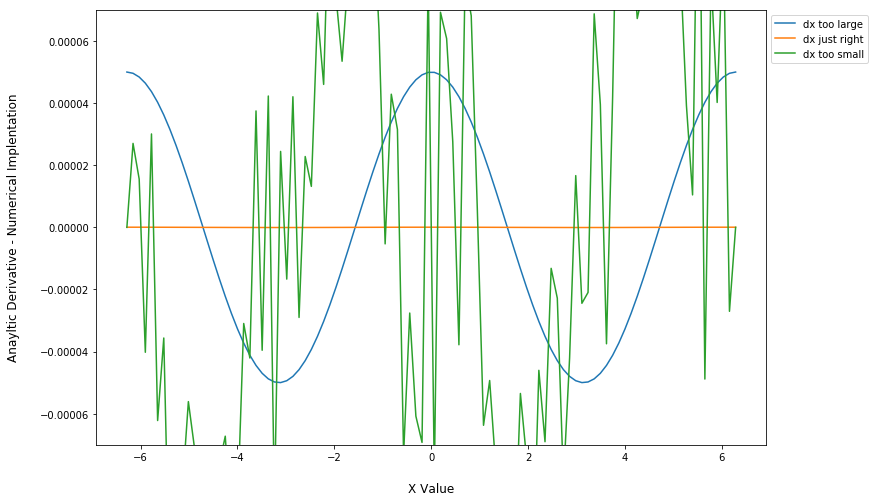

In [44]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-7)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(12, 8))
plt.ylabel("Anayltic Derivative - Numerical Implentation", size=12, labelpad=20)
plt.xlabel("X Value", size=12, labelpad=20)
dx_too_small = plt.plot(xs, df_dx_1 - df_dx_analytical, label='dx too large')
dx_just_right = plt.plot(xs, df_dx_2 - df_dx_analytical, label='dx just right')
dx_too_large = plt.plot(xs, df_dx_3 - df_dx_analytical, label='dx too small')
plt.ylim(-0.00007,0.00007)
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))


**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


The nature in which the computer stores numbers is based on a base power, and a set number of figures or digits for a given variable (x). In the case where dx becomes too small, the number of digits required to represent the true value of (x-dx) superceeds the number storable in the system. When perfoming sums such as (x-dx) where x>>dx, too much information (digits) are lost, creating unknown figures of which the program determines a random value, which are of a higher power than when dx is too large, hence creating a seemingly random and eratic plot. When the intervals get too large, the calculation x-dx now has too few digits, which creates unknown numbers of a lower power. These are far less significant than when dx is too small, and this is why the plot is innacurate (not 0), however fluctuates cleanly in the fashion it does.